In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/Administrator/Downloads/titanic_dataset.csv")
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C


In [3]:
df.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64

In [4]:
mean_age=round(df["age"].mean())
df["age"]=df["age"].fillna(mean_age)

In [5]:
df.drop(["name","cabin","ticket"],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1308 non-null   float64
 7   embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 71.6+ KB


In [7]:
x=pd.get_dummies(df["sex"])
df["sex"]=x["male"]

In [8]:
y=pd.get_dummies(df["embarked"])
df["embarked=Q"]=y["Q"]
df["embarked=C"]=y["C"]


In [9]:
df.drop(["fare","embarked"],axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   int64  
 1   survived    1309 non-null   int64  
 2   sex         1309 non-null   uint8  
 3   age         1309 non-null   float64
 4   sibsp       1309 non-null   int64  
 5   parch       1309 non-null   int64  
 6   embarked=Q  1309 non-null   uint8  
 7   embarked=C  1309 non-null   uint8  
dtypes: float64(1), int64(4), uint8(3)
memory usage: 55.0 KB


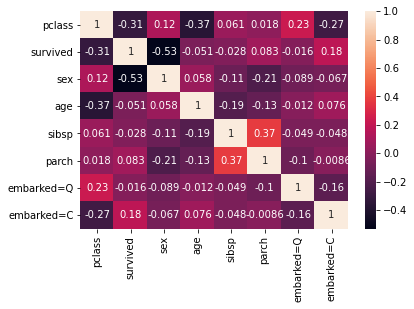

In [11]:
sns.heatmap(df.corr(),annot=True)

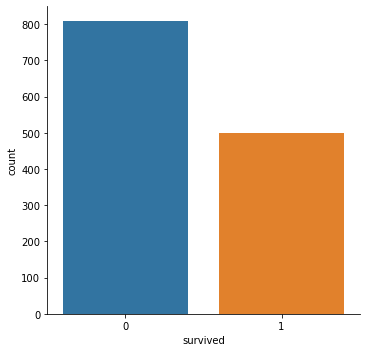

In [12]:
sns.catplot(data=df,kind="count",x="survived")

In [13]:
y=df['survived']
x=df.drop("survived",axis=1)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)


In [16]:
from sklearn.linear_model import LogisticRegression


In [17]:
model=LogisticRegression()


In [19]:
model.fit(xtrain,ytrain)

C:\Users\Administrator\download\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
ypred=model.predict(xtest)

In [21]:
ypred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
      dtype=int64)

Accuracy is: 0.7900763358778626
[[142  20]
 [ 35  65]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       162
           1       0.76      0.65      0.70       100

    accuracy                           0.79       262
   macro avg       0.78      0.76      0.77       262
weighted avg       0.79      0.79      0.79       262



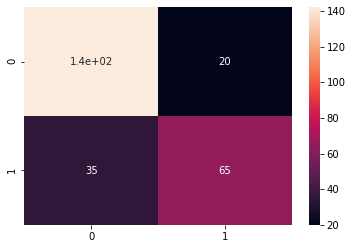

In [22]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
acc=accuracy_score(ytest,ypred)
print("Accuracy is:",acc)
cm=confusion_matrix(ytest,ypred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

In [23]:
tn,fp,fn,tp =confusion_matrix(ytest,ypred).flatten()
print("True Positive:",tp)
print("False Positive:",fp)
print("True Negative:",tn)
print("False Positive:",fn)

True Positive: 65
False Positive: 20
True Negative: 142
False Positive: 35
